# Моделирование двухпроводной линии передачи, нагруженной на комплексное сопротивлениею.
## Вариант 9.

Выполнить моделирование работы двухпроводной линии передачи в *Jupyter Notebook*.   
Основные подключаемые библиотеки: *numpy* (для работы с массивами) и *matplotlib.pyplot* (для вывода графиков).

Постановка задачи:
Пусть линия с волновым сопротивлением *W* нагружена на активное сопротивление Rн (или реактивное сопротивление Хн). Нарисовать графики эпюр распределения амплитуд напряжения и тока вдоль линии.   
Волновое сопротивление двухпроводной линии рассчитать по формуле *W=276 lg(D/r)*, где *D=20 мм* - расстояние между центрами проводов линии, *r=1 мм* - радиус провода линии.  
**Rн=144  
Хн=-173**


In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
lmd = 1 
Rn = 144
Xn = -173
Zn = Rn + Xn*1j 
Un=1 
D=20*10**(-3)
r=1*10**(-3)

Расчитаем волновое сопротивление:

In [3]:
W=276*np.log10(D/r)
print('W =', W, "[Ом]")

W = 359.0842788032588 [Ом]


In [4]:
z=np.linspace(0,2,1000)*lmd
In=Un/Zn
U=Un*np.cos(2*np.pi/lmd*z)+In*W*np.sin(2*np.pi/lmd*z)*1j
I=In*np.cos(2*np.pi/lmd*z)+Un/W*np.sin(2*np.pi/lmd*z)*1j

Text(0, 0.5, '|I|, А')

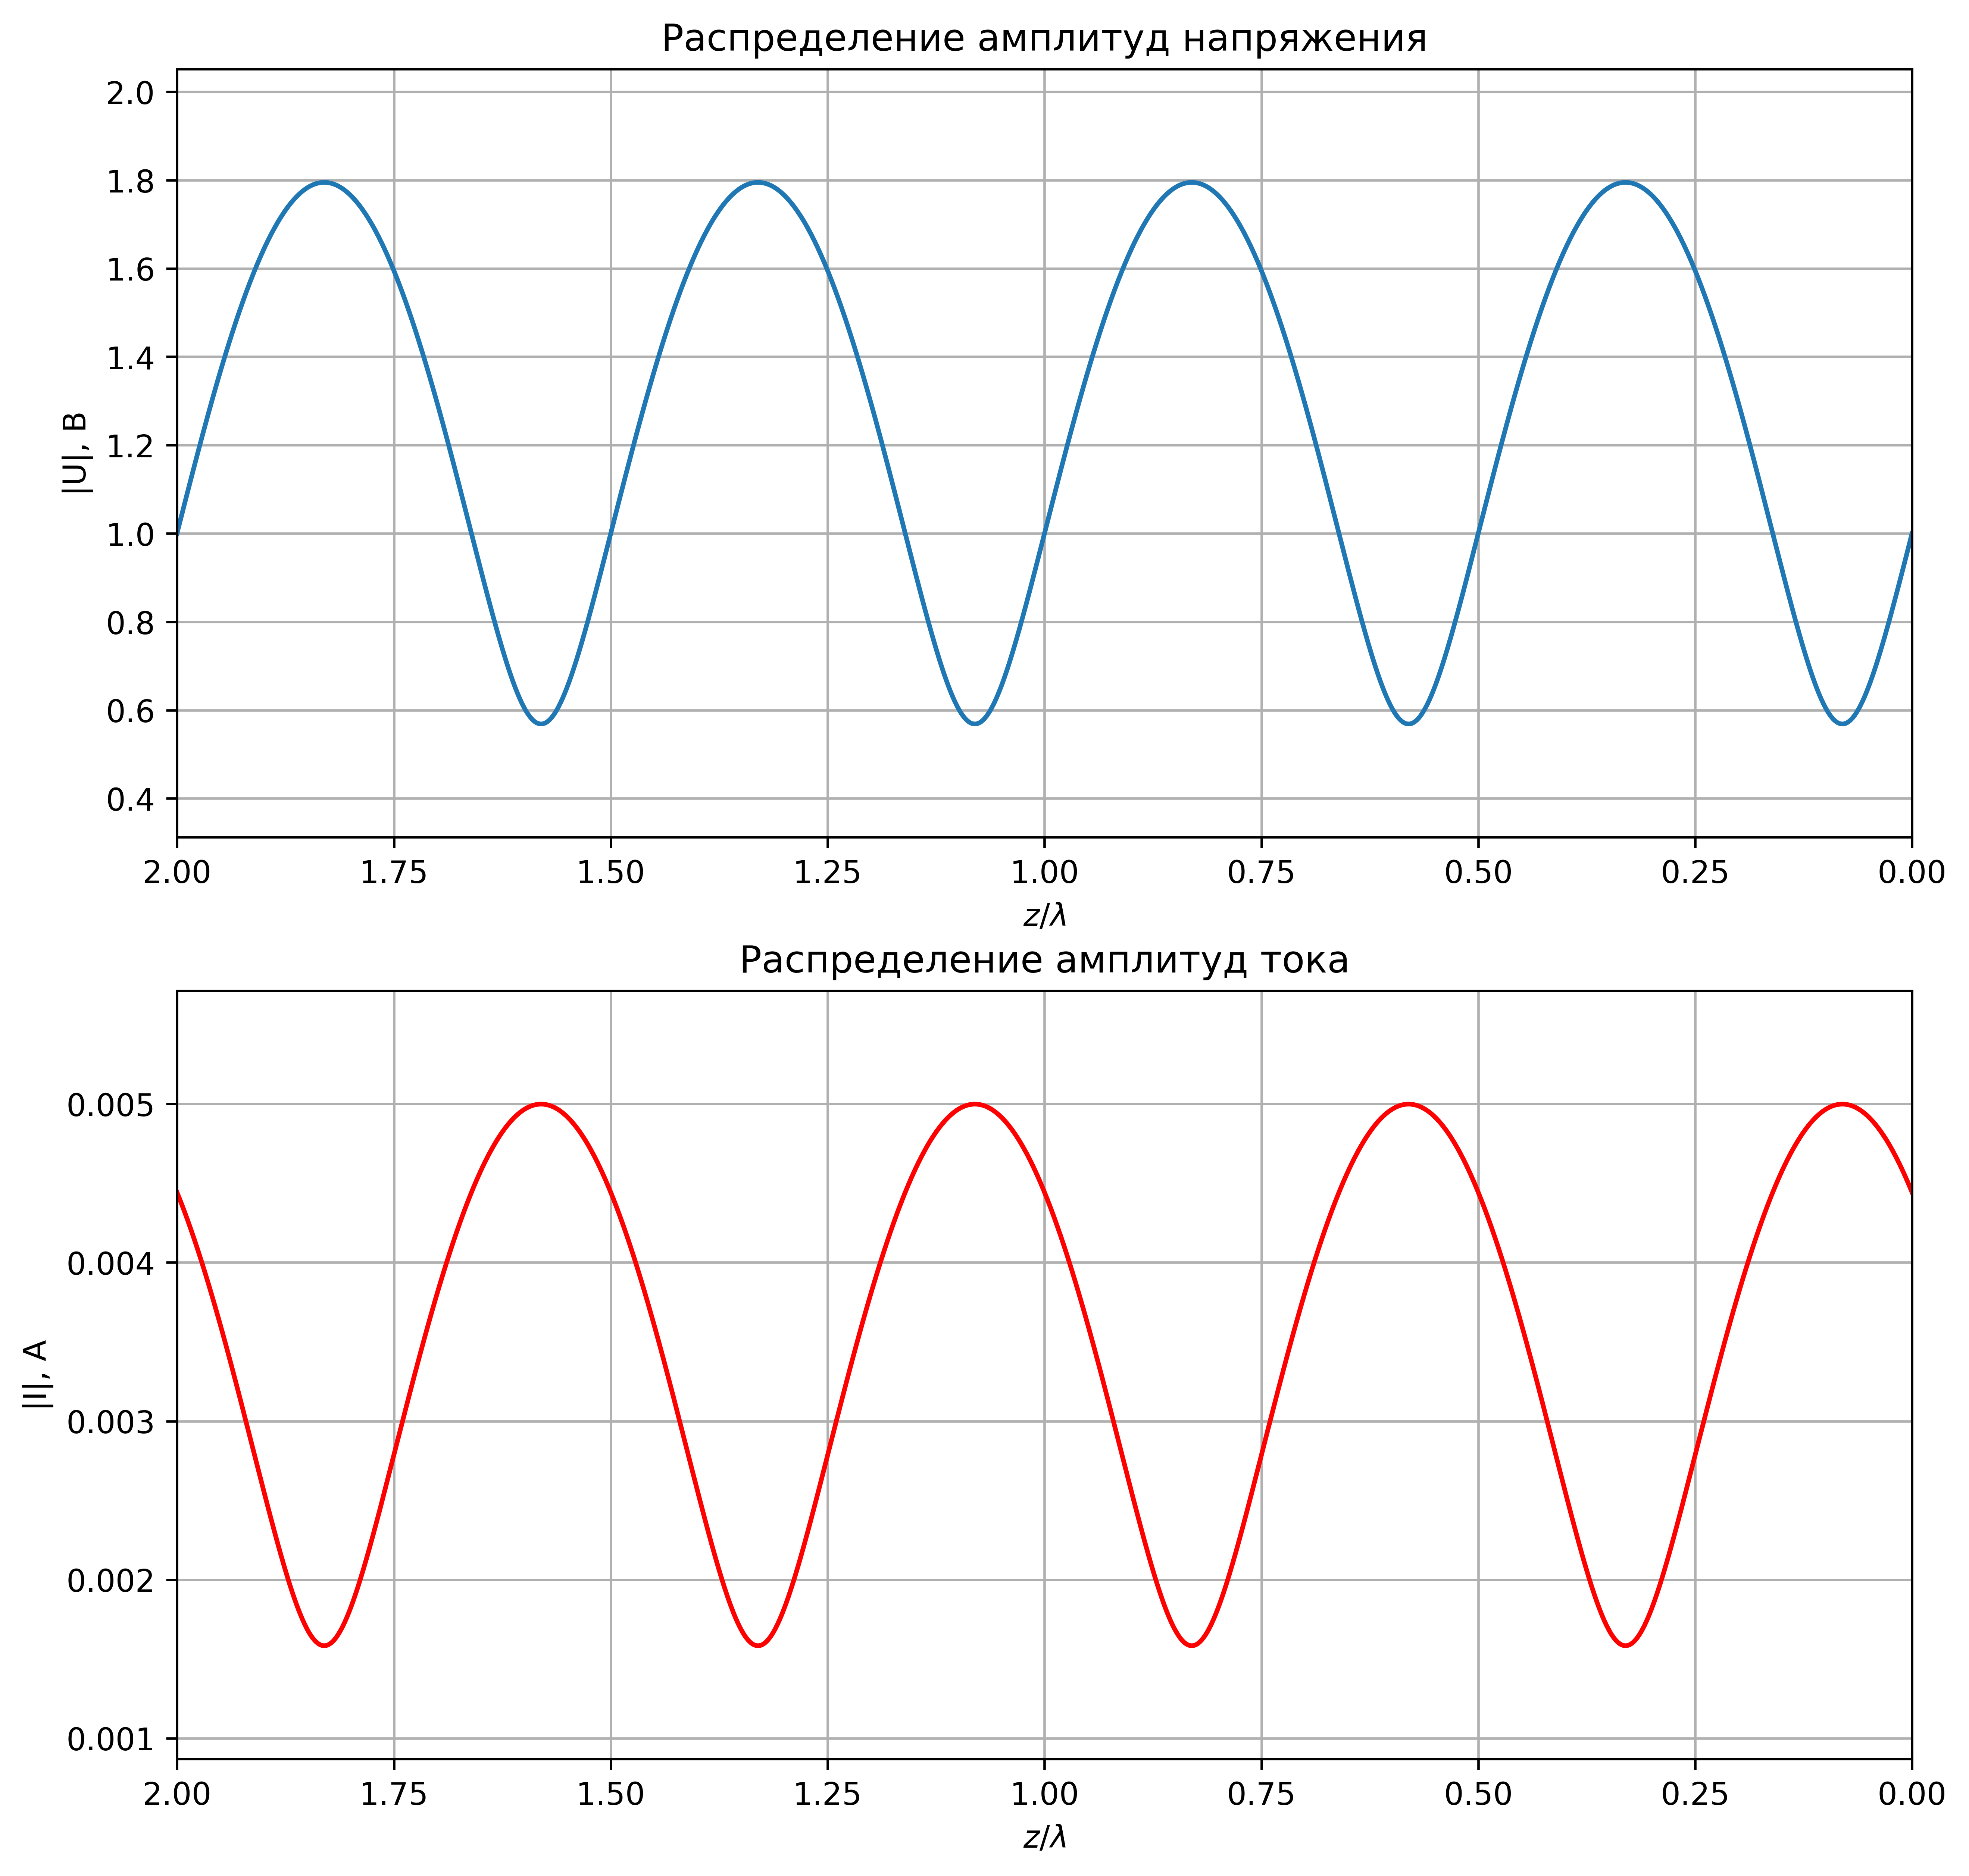

In [8]:
fig1, ax = plt.subplots(2,1,figsize=(10, 10), dpi=600)

ax[0].plot(z,np.abs(U))
ax[0].grid()
ax[0].set_xlim([2,0])
ax[0].set_ylim([min(abs(U))-1/7*max(abs(U)), max(abs(U))+1/7*max(abs(U))])
ax[1].set_ylim([min(abs(I))-1/7*max(abs(I)), max(abs(I))+1/7*max(abs(I))])
ax[0].set_xlabel('$z/\lambda$')
ax[0].set_ylabel('|U|, В')
ax[0].set_title("Распределение амплитуд напряжения")
ax[1].set_title("Распределение амплитуд тока")
ax[1].plot(z,np.abs(I),'r')
ax[1].grid()
ax[1].set_xlim([2,0])
ax[1].set_xlabel("$z/\lambda$")
ax[1].set_ylabel('|I|, А')



Расчитаем коэффциент бегущей волны, коэффициент стоящей волны и коэффициент отражения


In [6]:
G=(Zn-W)/(Zn+W)
Ksv=(1+abs(G))/(1-abs(G))
Kbv=1/Ksv
print("Кбв =",Kbv,"Ксв =",Ksv,
     "|Г| =",abs(G))

Кбв = 0.3167886629213771 Ксв = 3.1566786222024215 |Г| = 0.5188466124570638


Расчитаем Кбв и Ксв по минимальному и максимальному значению напряжения

In [7]:
print("Кбв =",min(abs(U))/max(abs(U)),"Ксв =",max(abs(U))/min(abs(U)))

Кбв = 0.31679052627173965 Ксв = 3.156660054733488
